In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/insurance.csv'
data= pd.read_csv(file_url)

In [4]:
data

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


In [5]:
data.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


Age
Sex: 0 male 1 female
BMI
Children: Number of children he/she has
Smoker 0 None 1 Yes
Charges: How much they were charged

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


In [8]:
round(data.describe(),2)

,age,sex,bmi,children,smoker,charges
count,1338.00,1338.00,1338.00,1338.00,1338.0,1338.00
mean,39.21,0.51,30.66,1.09,0.2,13270.42
std,14.05,0.50,6.10,1.21,0.4,12110.01
min,18.00,0.00,15.96,0.00,0.0,1121.87
25%,27.00,0.00,26.30,0.00,0.0,4740.29
50%,39.00,1.00,30.40,1.00,0.0,9382.03
75%,51.00,1.00,34.69,2.00,0.0,16639.91
max,64.00,1.00,53.13,5.00,1.0,63770.43


In [10]:
X = data[['age','sex','bmi','children', 'smoker']]
y = data[['charges']]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2)

In [14]:
model= LinearRegression()

In [30]:
model.fit(X_train, y_train)

LinearRegression()

In [31]:
pred=model.predict(X_test)

In [39]:
comparison = pd.DataFrame({'actual':y_test.iloc[:, 0].values, 'pred': pred[:,0]})

In [40]:
comparison

,actual,pred
0,47496.49445,39308.958720
1,13352.09980,13515.820454
2,20234.85475,29768.642633
3,13390.55900,14018.807739
4,2855.43755,4880.374841
...,...,...
263,28923.13692,11917.509885
264,11326.71487,10334.938844
265,34806.46770,28927.880213
266,8965.79575,8441.475937


<Axes: xlabel='actual', ylabel='pred'>

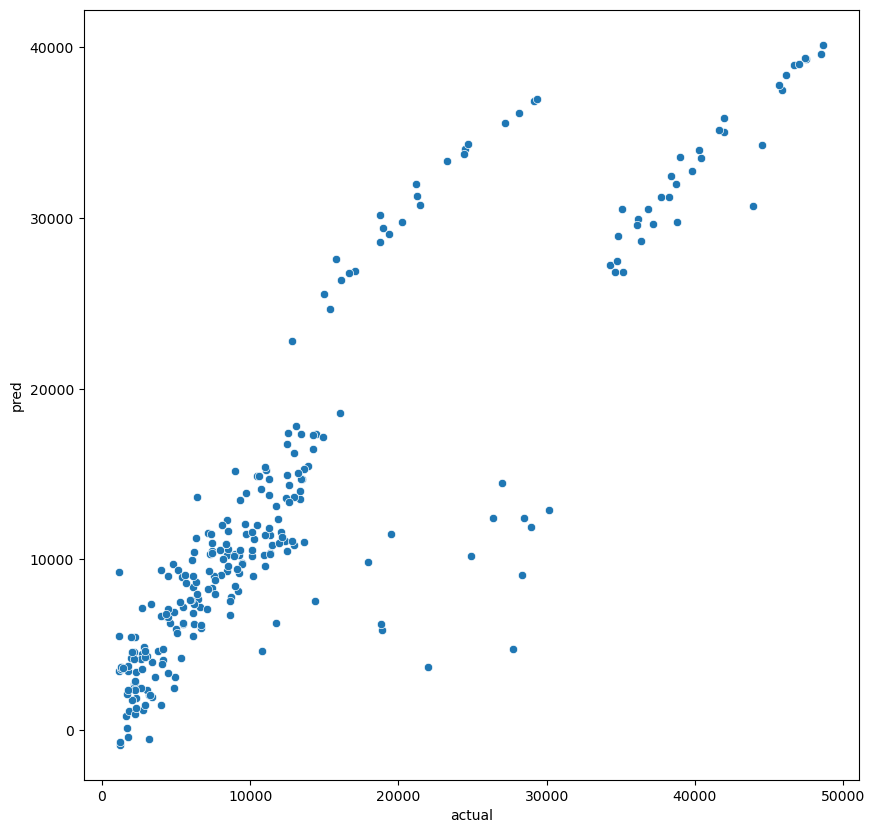

In [44]:
plt.figure(figsize =(10, 10))
sns.scatterplot(x='actual', y='pred', data = comparison)

RMSE

In [54]:
mean_squared_error(y_test, pred)**.5

5634.2287791516765

In [46]:
mean_squared_error(y_test, pred, squared = False)

5634.2287791516765

R squared

In [48]:
model.score(X_train, y_train)

0.7392941159711799

In [92]:
pd.DataFrame(model.coef_.transpose(), index=X.columns)

,0
age,260.331176
sex,-222.739647
bmi,311.097575
children,498.668667
smoker,23679.663953


In [93]:
model.intercept_

array([-11741.12203028])